### Preprocess steps: 
Firstly the comments are being preprocessed here through tokenizing and PoS tagging 

In [1]:
import nltk
import pandas as pd
import re
nltk.download('averaged_perceptron_tagger')


# Load your dataset
df = pd.read_csv('Labelled_Dataset.csv')

# Extract the comments from the dataset
comments = df['COMMENTS'].tolist()

# Tokenize the comments
tokenized_comments = [nltk.word_tokenize(comment) for comment in comments]




# Perform part of speech tagging on the tokenized comments
pos_tagged_comments = [nltk.pos_tag(comment) for comment in tokenized_comments]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rising.volkan007/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
print(pos_tagged_comments) # printing the PoS tagging

[[('I', 'PRP'), ("'m", 'VBP'), ('back', 'RB'), ('and', 'CC'), ('unimpressed', 'JJ'), ('.', '.'), ('The', 'DT'), ('film', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('second', 'JJ'), ('worse', 'NN'), ('In', 'IN'), ('the', 'DT'), ('franchise', 'NN'), ('.', '.')], [('What', 'WP'), ('timeline', 'NN'), ('did', 'VBD'), ('a', 'DT'), ('jump', 'NN'), ('to', 'TO'), ('?', '.'), ('?', '.'), ('I', 'PRP'), ('remember', 'VBP'), ('waiting', 'VBG'), ('for', 'IN'), ('2023', 'CD'), ('for', 'IN'), ('this', 'DT'), ('movie', 'NN'), ('to', 'TO'), ('be', 'VB'), ('released', 'VBN'), ('this', 'DT'), ('past', 'JJ'), ('summer', 'NN'), ('üò≥', 'NN')], [('The', 'DT'), ('worst', 'JJS'), ('part', 'NN'), ('of', 'IN'), ('this', 'DT'), ('are', 'VBP'), ('the', 'DT'), ('dinosaurs', 'NNS'), ('thriving', 'VBG'), ('in', 'IN'), ('the', 'DT'), ('winter', 'NN'), ('snow', 'NN'), ('.', '.')], [('Baby', 'NNP'), ('blue', 'NN')], [('WOW', 'NN')], [('This', 'DT'), ('movie', 'NN'), ('was', 'VBD'), ('amazing', 'VBG'), ('.', '.'), ('It', 'PR

### Removing Emoji:

A function is defined for removing emoji, emoticons from the text and it is applied to the comments column

In [3]:
import re

def remove_emoticons(text):
  # Remove all emojis and emoticons from the text
  return re.sub(r'[^\w\s]', '', text)

# Remove emojis and emoticons from the 'COMMENTS' column of the dataframe
df['COMMENTS'] = df['COMMENTS'].apply(remove_emoticons)

In [4]:
df.head(10) # This is to check the top ten data list of the dataset

LABEL                                            COMMENTS
0  Negative   Im back and unimpressed The film is the second...
1   Neutral   What timeline did a jump to I remember waiting...
2  Negative   The worst part of this are the dinosaurs thriv...
3   Neutral                                           Baby blue
4  Positive                                                 WOW
5  Positive   This movie was amazing It was well thought out...
6   Neutral                                         going watch
7   Neutral   All Jurassic Park movies belong to Sam Neil No...
8   Neutral   Funny you dont see any Mammoths in these films...
9  Negative   Those raptor sounds are really getting old Jee...

In [5]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Load the dataset
#df = pd.read_csv('/Users/rising.volkan007/Desktop/sentiment analysis/Dataset-rebalanced.csv')

# Tokenize the comments
df['TOKENIZED_COMMENTS'] = df['COMMENTS'].apply(word_tokenize)


#### Now function for preprocess_comment and preprocess_text will be defined so that it can be used to train the model

In [6]:
from nltk.tokenize import word_tokenize

def preprocess_comment(comment):
    
    # Tokenize the comment
    words = word_tokenize(comment)
    
    return words

# call the function and store the result in variable
result = preprocess_comment("This is an example comment")
print(result)

['This', 'is', 'an', 'example', 'comment']


In [7]:
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    comment = text
    # Tokenize the comment
    words = word_tokenize(comment)

    # Fit the vectorizer on the words
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(words)
    return vectors

# call the function
vectors = preprocess_text("This is an example comment")
print(vectors)

  (0, 4)	1
  (1, 3)	1
  (2, 0)	1
  (3, 2)	1
  (4, 1)	1


In [8]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    comment = text
    # Tokenize the comment
    words = word_tokenize(comment)
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Create a CountVectorizer object
    vectorizer = CountVectorizer()

    # Fit the vectorizer on the lemmatized words
    vectors = vectorizer.fit_transform(lemmatized_words)

    # View the vectors as a dense array
    return vectors.toarray()

# call the function
vectors = preprocess_text("This is an example comment")
print(vectors)

[[0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]


In [9]:
df.columns

Index(['LABEL ', 'COMMENTS', 'TOKENIZED_COMMENTS'], dtype='object')

LABEL column seems to have an extra space which needs to be fixed

In [10]:
df.loc[:, 'LABEL ']
df.rename(columns={'LABEL ': 'LABEL'}, inplace=True) # LABEL column is renamed removing that extra white space

Here the Labels from the LABEL column are being extracted and through strip() function any duplicate and white spaced values are removed.

In [11]:
# Extract the labels from the dataset
labels = df['LABEL'].tolist()

# Add the labels as a new column in the dataframe
labels = [label.strip() for label in labels]

df['LABEL'] = labels

# Check the shape of the 'LABEL' column
print(df['LABEL'].shape)


(1199,)


Negative    512
Positive    511
Neutral     176
Name: LABEL, dtype: int64


<AxesSubplot:>

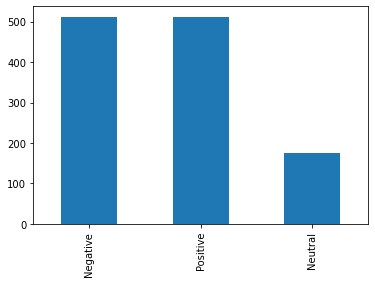

In [12]:

print(df['LABEL'].value_counts())

# Plot a bar chart of the value counts
df['LABEL'].value_counts().plot(kind='bar')

### Now logistic regression model is implemented to classify the comments based on their text. Data are being splited into test and training then the model's performance is measured through accuracy rate and classification report

In [13]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 2))

# Preprocess and vectorize the comments
def preprocess_comment(comment):
    # Do any preprocessing you want here
    # ...
    return comment

# ...

processed_comments = []
for comment in df['COMMENTS']:
    processed_comment = preprocess_comment(comment)
    processed_comments.append(processed_comment)

# Fit the vectorizer on the processed comments
vectors = vectorizer.fit_transform(processed_comments)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(vectors, df['LABEL'], test_size=0.20, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.5f}')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rising.volkan007/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.77500


In [14]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.76      0.91      0.83       112
     Neutral       0.86      0.18      0.29        34
    Positive       0.80      0.83      0.81        94

    accuracy                           0.78       240
   macro avg       0.80      0.64      0.64       240
weighted avg       0.79      0.78      0.75       240



This method is generally known as a BoW (Bag of Words) approach because it converts the text into a bag of words (i.e., a set of word counts) that are then used as features for the model. 

Now test comments are passed to check whether the model can predict the sentiment.

In [15]:
# Preprocess the comment
new_comment="This movie is average!" # expected for this sentence's sentiment to be as neutral
processed_comment = preprocess_comment(new_comment)

# Vectorize the comment
vectors = vectorizer.transform([processed_comment])

# Use the model to predict the sentiment
prediction = model.predict(vectors)

print("The sentiment is:", prediction)

The sentiment is: ['Neutral']


Another classifier model called random forest has been implemented to train a sentiment analysis model.It is an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.


At first the functions for preprocess comment and predict sentiment are being defined to implement in the model.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def preprocess_comment(comment):
    # Do any preprocessing you want here
    # ...
    return comment


def predict_sentiment(classifier, comment, vectorizer):
    # Preprocess the comment
    comment = preprocess_comment(comment)

    # Convert the comment to a vector
    comment_vector = vectorizer.transform([comment])

    # Predict the sentiment of the comment
    sentiment = classifier.predict(comment_vector)[0]

    return sentiment

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
# Define the comments and labels
comments = df['COMMENTS'].tolist()
labels = df['LABEL'].tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.20, random_state=42)


# Preprocess the comments in the training and test sets
X_train = [preprocess_comment(comment) for comment in X_train]
X_test = [preprocess_comment(comment) for comment in X_test]


# Vectorize the comments in the training and test sets
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_vectors, y_train)

# Evaluate the classifier
accuracy = classifier.score(X_test_vectors, y_test)
print(f'Accuracy: {accuracy:.2f}')


test_comments = ['This movie is great!', 'This movie is bad', 'This movie is average'] # expected sentiments are positive, negative, neutral
y_pred = classifier.predict(vectorizer.transform(test_comments))

print(y_pred)


Accuracy: 0.79
['Positive' 'Negative' 'Neutral']


In [18]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vectors)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.88      0.83      0.85       112
     Neutral       0.65      0.50      0.57        34
    Positive       0.73      0.84      0.78        94

    accuracy                           0.79       240
   macro avg       0.75      0.72      0.73       240
weighted avg       0.79      0.79      0.78       240



### evaluation of results

The first set of evaluation results show generally high precision and recall scores for all three categories of sentiment (negative, neutral, positive). The support values indicate that there are 112 negative, 34 neutral, and 94 positive examples in the test set.

The second set of results show generally lower scores for all three categories of sentiment. The precision for negative and positive sentiment is higher than that of the first set of results, while the recall is lower. The neutral sentiment has a lower precision and recall. The support values indicate that there are 112 negative, 34 neutral and 94 positive examples in the test set.

#### Comparison

In general, precision measures the proportion of true positive predictions among all positive predictions, while recall measures the proportion of true positive predictions among all actual positive examples. A high precision means that the model is good at not labeling negative examples as positive, while a high recall means that the model is good at finding all the positive examples. In this case, the first set of results show generally better scores on both precision and recall, indicating that the model is making fewer false positive predictions and is able to find more actual positive examples.